## 자동차 등록대수 및 증감률

### 데이터 불러와서 전처리

### 자동차 등록대수

In [1]:
import pandas as pd
import numpy as np

file_path = './data/raw/자동차등록대수현황_연도별.csv'
car_year = pd.read_csv(file_path, encoding='euc-kr')
car_year = car_year.transpose()
car_year

,0,1,2,3,4
구분(1),구분(1),총합계,총합계,총합계,총합계
레벨01(1),레벨01(1),승용,승합,화물,특수
2015,계,16561665,920320,3432937,74963
2015.1,관용,27004,19079,29052,2422
2015.2,자가용,15807517,776127,3020822,18103
2015.3,영업용,727144,125114,383063,54438
2016,계,17338160,892539,3492173,80479
2016.1,관용,27750,20260,29834,2532
2016.2,자가용,16505364,746360,3072915,20670
2016.3,영업용,805046,125919,389424,57277


In [2]:
car_year.iloc[[2]]

,0,1,2,3,4
2015,계,16561665,920320,3432937,74963


In [3]:
car_total = car_year.loc[['2015','2016','2017','2018','2019','2020','2021']]
car_total.columns = ['계','승용','승합','화물','특수']
car_total = car_total.drop(["계"], axis=1)
car_total = car_total.astype(int)
car_total

,승용,승합,화물,특수
2015,16561665,920320,3432937,74963
2016,17338160,892539,3492173,80479
2017,18034540,867522,3540323,85910
2018,18676924,843794,3590939,90898
2019,19177517,811799,3592586,95464
2020,19860955,783842,3615245,105937
2021,20410648,749968,3631975,118510


### 증감률

In [4]:
# 20 / 19 * 100
print(len(car_total))
car_total = car_total.reset_index()
car_total

7


,index,승용,승합,화물,특수
0,2015,16561665,920320,3432937,74963
1,2016,17338160,892539,3492173,80479
2,2017,18034540,867522,3540323,85910
3,2018,18676924,843794,3590939,90898
4,2019,19177517,811799,3592586,95464
5,2020,19860955,783842,3615245,105937
6,2021,20410648,749968,3631975,118510


In [39]:
car_total.columns = ['년도','승용','승합','화물','특수']
car_total

,년도,승용,승합,화물,특수
0,2015,16561665,920320,3432937,74963
1,2016,17338160,892539,3492173,80479
2,2017,18034540,867522,3540323,85910
3,2018,18676924,843794,3590939,90898
4,2019,19177517,811799,3592586,95464
5,2020,19860955,783842,3615245,105937
6,2021,20410648,749968,3631975,118510


In [42]:
ratio = []
for i in range(0, 7, 1):
    try:
        ratio.append(car_total.iloc[i+1]['승용'] / car_total.iloc[i]['승용'] * 100)
    except:
        pass
ratio = pd.DataFrame(ratio)
ratio.columns = ['증감비']
ratio.loc[6] = np.nan
ratio['년도'] = ['2015','2016','2017','2018','2019','2020','2021']
ratio

,증감비,년도
0,104.688508,2015
1,104.016458,2016
2,103.561965,2017
3,102.680275,2018
4,103.563746,2019
5,102.767707,2020
6,NaN,2021


In [43]:
df = pd.merge(car_total, ratio, how='outer', on='년도')
df

,년도,승용,승합,화물,특수,증감비
0,2015,16561665,920320,3432937,74963,104.688508
1,2016,17338160,892539,3492173,80479,104.016458
2,2017,18034540,867522,3540323,85910,103.561965
3,2018,18676924,843794,3590939,90898,102.680275
4,2019,19177517,811799,3592586,95464,103.563746
5,2020,19860955,783842,3615245,105937,102.767707
6,2021,20410648,749968,3631975,118510,NaN


### 시각화

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [13]:
a = ['2015','2016','2017','2018','2019','2020','2021']

k = []
for x in range(len(a)):
    k.append(a[x])
print(k)
print(len(k))

['2015', '2016', '2017', '2018', '2019', '2020', '2021']
7


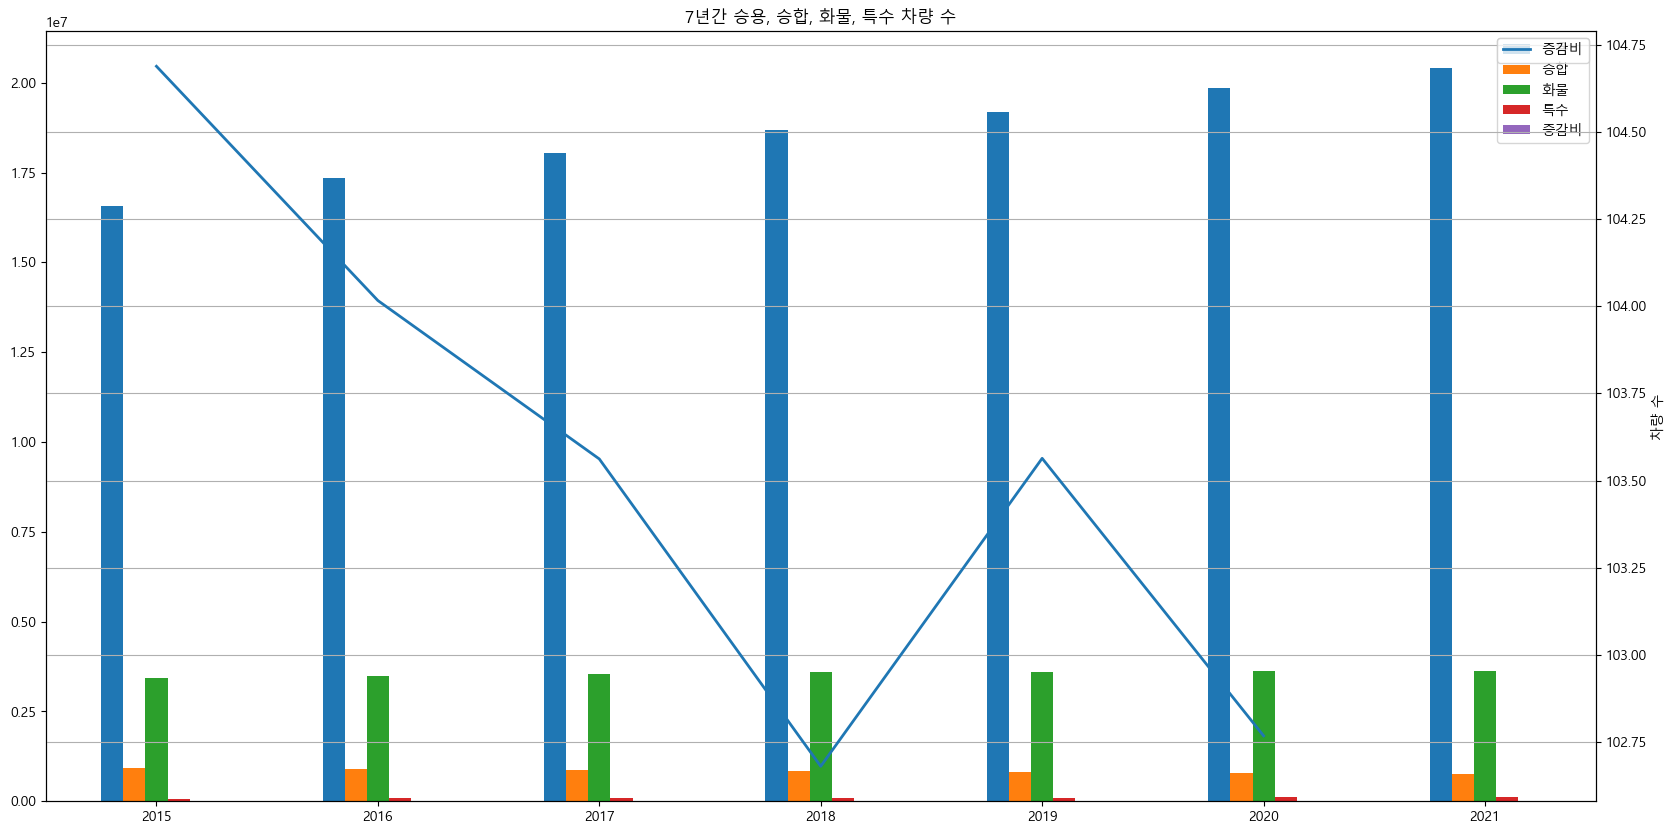

In [46]:
# 그래프 크기 지정하기 = 너비, 높이
plt.rcParams['figure.figsize'] = (20, 10)

# 선의 두께 지정
plt.rcParams['lines.linewidth'] = 2
# 폰트지정
plt.rc("font", family = "Malgun Gothic", size=10)


# 데이터 넣기
ax1 = df.plot.bar()
# x축 범위?
a = list(range(0,7,1))
plt.xticks([i for i in range(0,7,1)], k, rotation = 0)

ax2 = ax1.twinx()
ax2 = df['증감비'].plot()

plt.title("7년간 승용, 승합, 화물, 특수 차량 수")
plt.ylabel("차량 수")

# x축 범위?
a = list(range(0,7,1))
plt.xticks([i for i in range(0,7,1)], k, rotation = 0)


# 범례 위치 변경하기
plt.legend(loc="upper right")
# 그래프 내에 그리드선 표시하기
plt.grid(True)

plt.show()

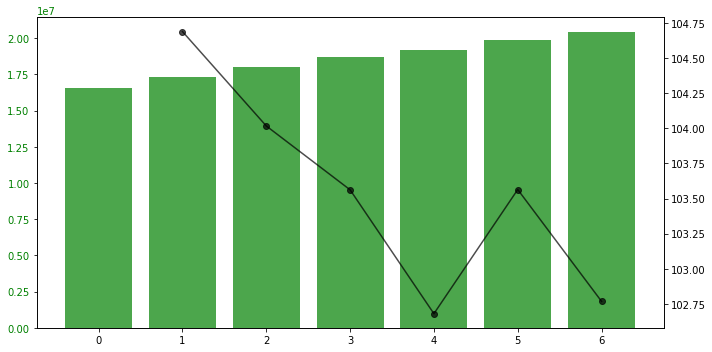

In [ ]:
import matplotlib.pyplot as plt

plt.rcParams['figure.figsize'] = (10, 5)
fig, ax1 = plt.subplots()

ax1.bar(car_total.index, car_total['승용'], color='green', alpha=0.7)
ax1.tick_params(axis='y', labelcolor='green')


ax5 = ax1.twinx()
ax5.plot(ratio.index, ratio['증감비'], marker='o', color='black', alpha=0.7)
ax5.tick_params(axis='y', labelcolor='black')

fig.tight_layout()
plt.show()

<AxesSubplot:>

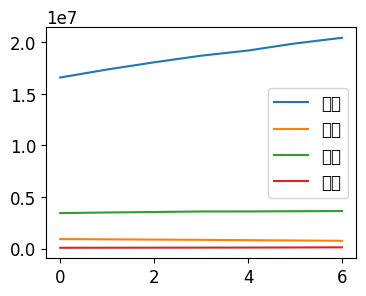

In [29]:
car_total.plot()

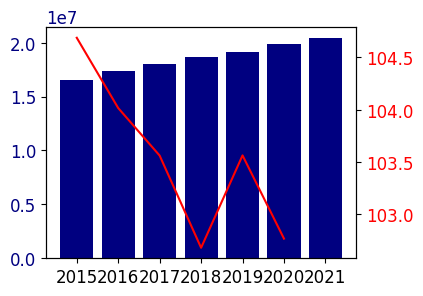

In [35]:
fig, ax1 = plt.subplots()
ax1.bar(car_total['년도'], car_total['승용'], color="navy")
ax1.tick_params(axis='y', labelcolor="navy")
 
ax2 = ax1.twinx() #한 그래프에 두번째 plot 넣기
ax2.plot(car_total['년도'], ratio['증감비'], color="red")
ax2.tick_params(axis='y', labelcolor="red")
 
plt.show()